# Capstone Project 

## Business Understanding

As an employee of Universal Banking Corporation (UBC) we have noticed the growing population of our bank's users. 
Given recent measures and the economic climate we are trying to produce and improve the way the bank seeks out and provides customer loans. We are producing a model that will predict the likelihood of a customer obtaining a loan from UBC. This project investigates a Bank Loan Modelling dataset. The California Housing Dataset was used in addition to the Bank Loan Modelling dataset to obtain additional features. By using the longitude and latitude data from the California Housing Dataset, I was able to convert the coordinates into zipcodes and merge this with the Bank Loan Modelling Dataset.

### Importing Libraries

In [3]:
#Importing our usual standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Exploring the Bank Loan Modelling Data

In [20]:
bank_loan = pd.read_csv('data/personal_loan.csv') #change to bank loan df

In [21]:
#Checking the total number of rows and columns in our data

bank_loan.shape

(5000, 14)

In [22]:
bank_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Our target variable is the personal loan column. We will use the ZIP Code data as from an additional data set, the California Housing Data to extract additional features. 

In [23]:
#Checking to see the number of missing values in each column

bank_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Fortunately in this case there are no missing values

In [24]:
bank_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Exploring the California Housing Data

In [4]:
#Importing the California Housing Data

cali_housing = pd.read_csv('data/housing.csv')

In [5]:
#Checking to see the shape of the data

cali_housing.shape

(20640, 10)

In [6]:
#Checking to see which columns has missing data

cali_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#Dropping our missing values in the total bedrooms column

cali_housing.dropna(subset=['total_bedrooms'], inplace=True)

In [8]:
#Checking to see if the total bedrooms column has dropped our missing values

cali_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
#Finding out the total number of rows in our dataset

cali_housing.shape

(20433, 10)

In [10]:
cali_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geocoder

In [12]:
#We are going to convert the longitude and latitude data into ZIP Code

from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

def get_zipcode(lat, lon):
    result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
    if len(result) != 0:
        return result[0].zipcode

cali_housing['zipcode'] = cali_housing.apply(lambda x: get_zipcode(x.latitude, x.longitude), axis=1)
cali_housing




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zipcode
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,94704
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,94618
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,94618
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,94618
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,94618
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,94618
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,94618
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,94618
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,94609
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,94618


We can see that we have successfully converted our latitude and longitude data into ZIP codes. This is indicated on the far right column of our dataframe. We may now drop the latitude and longitude columns as this will no longer be needed. 

In [13]:
#Dropping the longitude and latitude columns

cali_housing.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [14]:
#Checking to see if the longitude and latitude columns have been dropped

cali_housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zipcode
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,94704
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,94618
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,94618
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,94618
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,94618


We want to match the zip code column to our original dataset. We will rename this as ZIP Code

In [15]:
#Renaming the zipcode to ZIP Code

cali_housing.rename(columns={'zipcode':'ZIP Code'}).head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ZIP Code
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,94704
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,94618
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,94618
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,94618
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,94618


In [16]:
#After converting our lat and lon data into ZIP codes we want to see if there are any missing rows

cali_housing.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               1
dtype: int64

We can see there is one missing row in zipcode. We will remove it in the next cell

In [17]:
#Remove the missing row in zipcode

cali_housing.dropna(subset=['zipcode'], inplace=True)

In [18]:
#Checking to see if the missing row is still present

cali_housing.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               0
dtype: int64

In [19]:
#Checking to see what types of data we have in our dataframe

cali_housing.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
zipcode                object
dtype: object

# Merging the Bank Loan Modelling and California Housing Data

In [108]:
#We are using the Bank Loan dataset and Cali House datase to merge our two datasets
#We will use an inner join because we only want to return a dataframe based on the rows present in both dataframes
#Our zip code is the common variable in both columns and we will target those columns in our left_on and right_on

Bank_Cali_Merge = pd.merge(bank_loan, cali_housing, how='inner', left_on='ZIP Code', right_on='zipcode')

In [109]:
Bank_Cali_Merge.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,zipcode
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,91107
1,456,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,91107
2,460,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,91107
3,576,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,91107
4,955,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,91107


Our zip code column has been successfully added but we can get rid of one of these columns after some additional data cleaning.

In [110]:
#Looking out for missing values

Bank_Cali_Merge.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               0
dtype: int64

No missing values. How very fortunate.

In [111]:
#Checking to see the data types in our new data frame
Bank_Cali_Merge.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code               object
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
zipcode                object
dtype: object

We can see the ocean_proximity is an object variable. This will need to be one hot encoded

In [112]:
#Dropping the zipcode column obtained from the Cali House Data and the ID column 

Bank_Cali_Merge.drop(columns=['ID','zipcode'], axis=1).head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND
1,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND
2,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND
3,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND
4,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND


In [113]:
Bank_Cali_Merge.shape

(71754, 23)

With ample rows of data and enough columns this will be more than enough information for our Machine Learning Algorithm. However we will need to get dummies on the ocean_proximity column

In [114]:
dummies = pd.get_dummies(Bank_Cali_Merge['ocean_proximity']) 
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


We have been able to successfully convert our Ocean Proximity column into dummies variables. We will concatenate this with our Bank_Cali_Merge dataframe. Then we will drop our ocean proximity column

In [115]:
#We will merge the dummies dataframe to our new dataset

bank_cali_merge_new = pd.concat([Bank_Cali_Merge, dummies], axis='columns') 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,zipcode,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,91107,0,1,0,0,0
1,456,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,91107,0,1,0,0,0
2,460,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,91107,0,1,0,0,0
3,576,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,91107,0,1,0,0,0
4,955,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,91107,0,1,0,0,0


In [116]:
#The ID and second zipcode from our Cali Housing data set won't be effective for our future we can drop that one

bank_cali_merge_new.drop(columns=['ID','zipcode'], axis=1, inplace=True)

In [118]:
bank_cali_merge_new.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
1,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
2,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
3,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
4,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0


In [119]:
#To display all our columns

pd.set_option('display.max_columns', None)

bank_cali_merge_new.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
1,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
2,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
3,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0
4,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,38.0,2981.0,432.0,1063.0,437.0,6.5254,365000.0,INLAND,0,1,0,0,0


In [123]:
#Dropping ocean proximity column

bank_cali_merge_new.drop(['ocean_proximity'],axis=1,inplace=True)

In [134]:
#Producing our summary statistics

bank_cali_merge_new.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,71754.000000,71754.00000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000,71754.000000
mean,45.346489,20.10897,73.361931,2.399699,1.918155,1.878808,56.609137,0.089291,0.098489,0.056234,0.600789,0.292541,30.728322,2770.656925,562.922499,1438.542966,531.724615,4.496625,267721.775218,0.445857,0.153692,0.000348,0.215709,0.184394
std,11.462416,11.46046,45.359998,1.147424,1.696461,0.842313,101.511697,0.285166,0.297977,0.230374,0.489740,0.454933,13.352891,2292.301281,447.011397,1218.865740,417.231916,2.218625,125022.307023,0.497063,0.360656,0.018663,0.411316,0.387808
min,23.000000,-3.00000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,3.000000,3.000000,3.000000,0.499900,17500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.00000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1551.000000,308.000000,786.000000,296.000000,3.012500,168900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.00000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,2274.000000,452.000000,1153.000000,429.000000,4.097200,250000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.00000,95.000000,3.000000,2.600000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000,41.000000,3304.000000,668.000000,1696.000000,632.000000,5.545400,349000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,67.000000,43.00000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


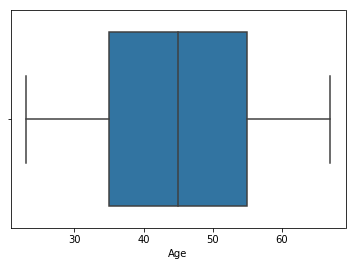

In [149]:
sns.boxplot(x=bank_cali_merge_new['Age'])

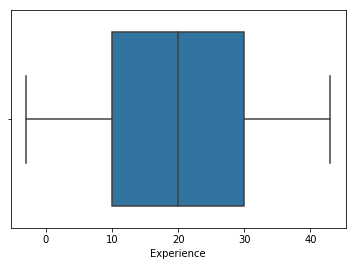

In [150]:
sns.boxplot(x=bank_cali_merge_new['Experience'])

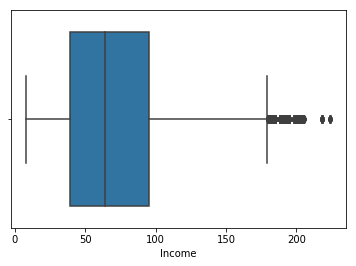

In [151]:
sns.boxplot(x=bank_cali_merge_new['Income'])

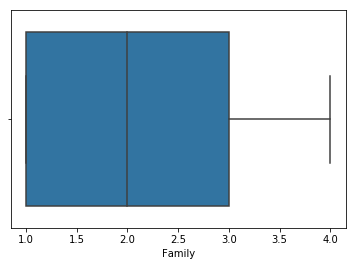

In [152]:
sns.boxplot(x=bank_cali_merge_new['Family'])

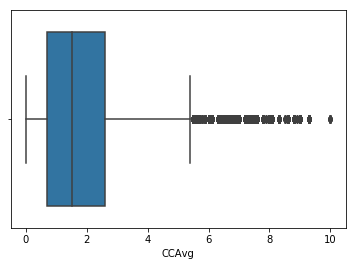

In [153]:
sns.boxplot(x=bank_cali_merge_new['CCAvg'])

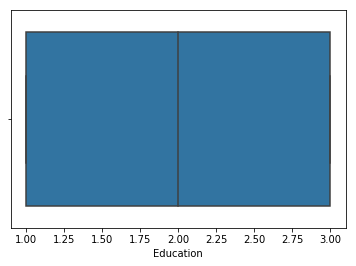

In [154]:
sns.boxplot(x=bank_cali_merge_new['Education'])

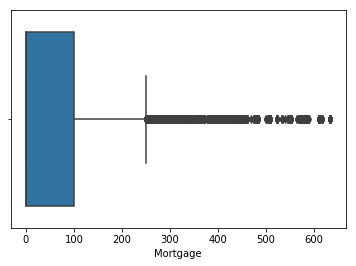

In [155]:
sns.boxplot(x=bank_cali_merge_new['Mortgage'])

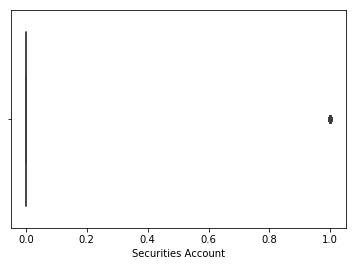

In [164]:
sns.boxplot(x=bank_cali_merge_new['Securities Account'])

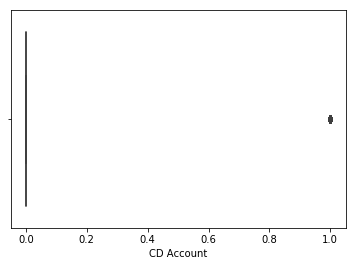

In [165]:
sns.boxplot(x=bank_cali_merge_new['CD Account'])

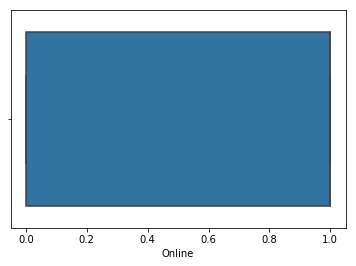

In [166]:
sns.boxplot(x=bank_cali_merge_new['Online'])

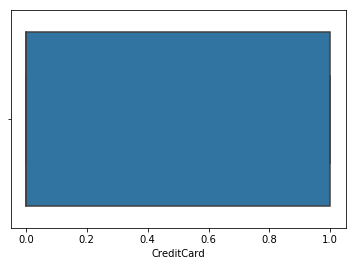

In [167]:
sns.boxplot(x=bank_cali_merge_new['CreditCard'])

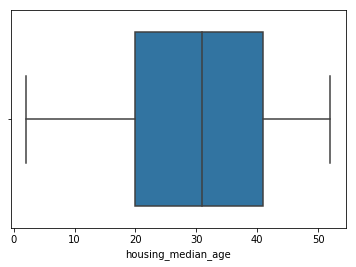

In [159]:
sns.boxplot(x=bank_cali_merge_new['housing_median_age'])

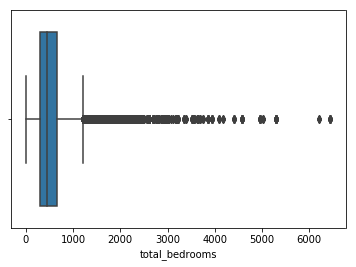

In [160]:
sns.boxplot(x=bank_cali_merge_new['total_bedrooms'])

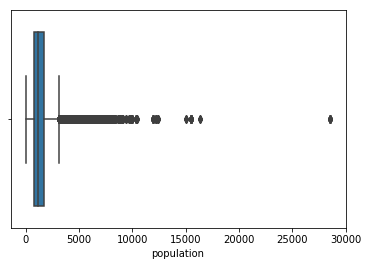

In [161]:
sns.boxplot(x=bank_cali_merge_new['population'])

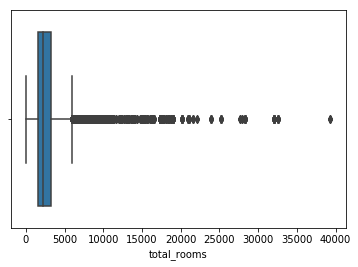

In [162]:
sns.boxplot(x=bank_cali_merge_new['total_rooms'])

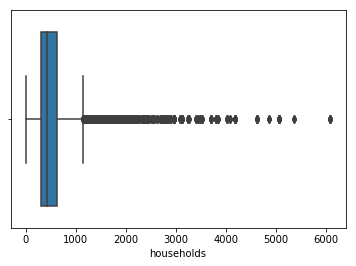

In [163]:
sns.boxplot(x=bank_cali_merge_new['households'])

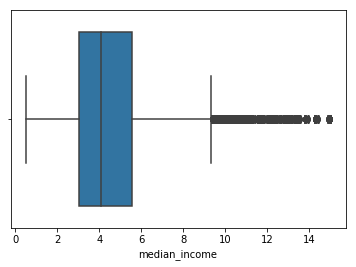

In [168]:
sns.boxplot(x=bank_cali_merge_new['median_income'])

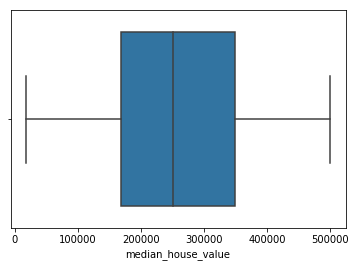

In [169]:
sns.boxplot(x=bank_cali_merge_new['median_house_value'])

# Data Visualizations

In [125]:
personal_loan_values = bank_cali_merge_new['Personal Loan'].value_counts()
personal_loan_values

0    65347
1     6407
Name: Personal Loan, dtype: int64

accepted 8.93 %
not_accepted 91.07 %


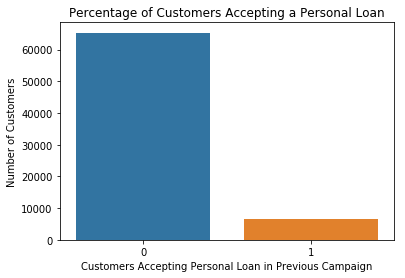

In [132]:
sns.barplot(personal_loan_values.index, personal_loan_values.values)
plt.title("Percentage of Customers Accepting a Personal Loan")
plt.ylabel("Number of Customers")
plt.xlabel("Customers Accepting Personal Loan in Previous Campaign")

not_accepted = (65347/(65347+6407)*100)
accepted = (6407/(65347+6407)*100)
print('accepted', round(accepted,2), '%')
print('not_accepted', round(not_accepted,2), '%')

This bar plot shows the percentage of people who were offered and accepted the personal loan in the previous campaign and the percentage of people who weren't offered a loan in the previous campaign. This corresponds to  8.93% and 91.07% respectively. 

We can see that there are clear class imbalance problems in our data. We will deal with this by applying the SMOTE technique to our training data set before we begin to produce our models.